--2024-10-16 10:32:33--  https://raw.githubusercontent.com/Abishek0411/Machinge-Learning-Lab/main/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4289 (4.2K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   4.19K  --.-KB/s    in 0s      

2024-10-16 10:32:33 (16.4 MB/s) - ‘Mall_Customers.csv’ saved [4289/4289]

Dataset Overview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Fe

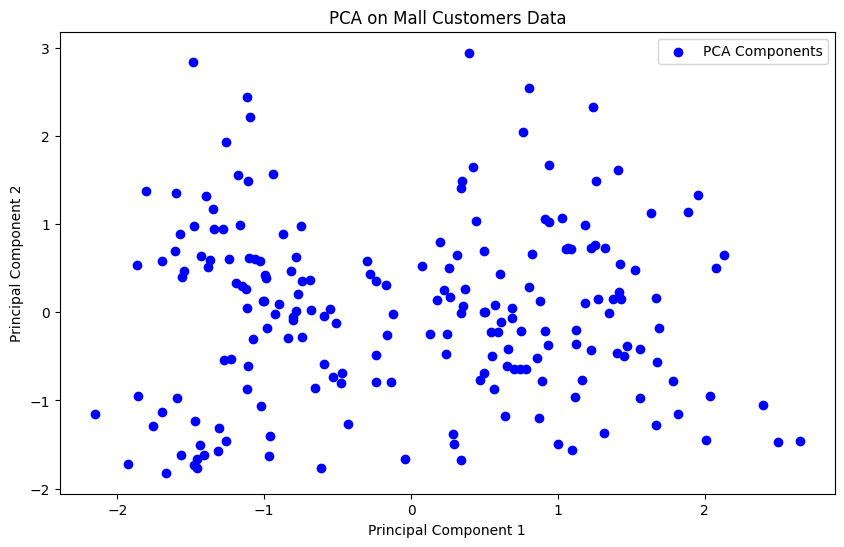

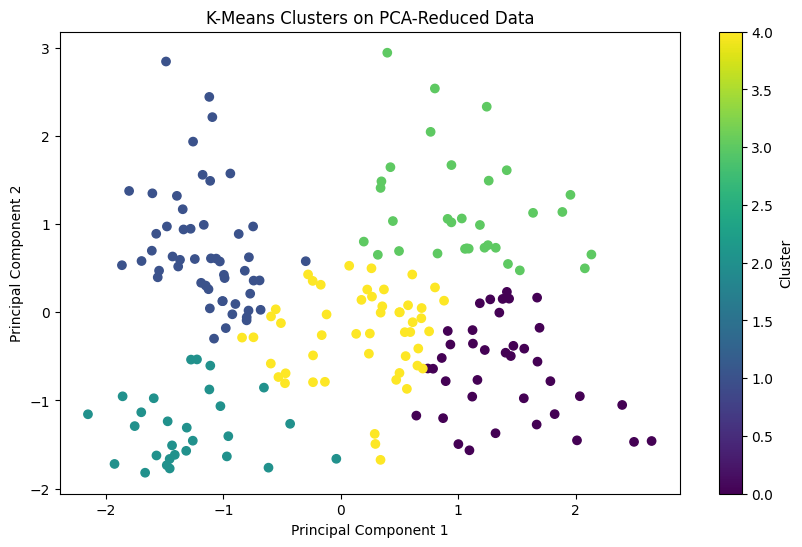

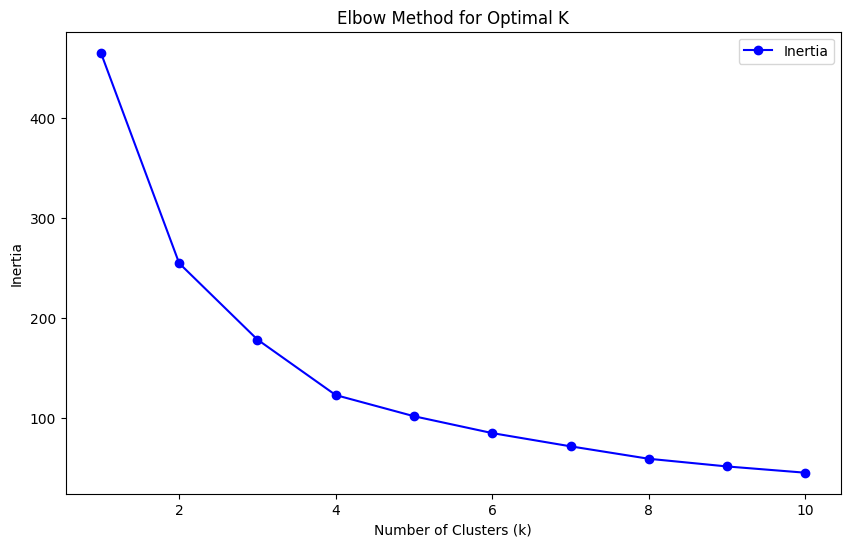

In [1]:
# Install necessary libraries
!pip install numpy pandas scikit-learn matplotlib seaborn

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Download the Mall Customers dataset from GitHub using wget (you can use a Kaggle link if needed)
!wget https://raw.githubusercontent.com/Abishek0411/Machinge-Learning-Lab/main/Mall_Customers.csv

# Load the dataset into a pandas DataFrame
df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset
print("Dataset Overview:")
print(df.head())

# Data Preprocessing
# We'll drop the 'CustomerID' as it's not a useful feature for clustering
df = df.drop('CustomerID', axis=1)

# Convert 'Gender' to numeric values (optional, depending on how you want to handle this column)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Select features for clustering (Annual Income, Spending Score, and optionally Gender)
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Apply PCA for Dimensionality Reduction (2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Explained Variance: {sum(pca.explained_variance_ratio_)}")

# Visualize the PCA-reduced data
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', label='PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Mall Customers Data')
plt.legend()
plt.show()

# 2. K-Means Clustering
# Choose the number of clusters (we'll use 5 as a common choice)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_pca)

# Cluster labels
labels = kmeans.labels_

# 3. Visualizing K-Means Clusters on PCA-Reduced Data
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', label='KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters on PCA-Reduced Data')
plt.colorbar(label='Cluster')
plt.show()

# 4. Elbow Method to find optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, 'bo-', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.legend()
plt.show()
